## Importing the dataset via Kaggle API

In [1]:
! pip install kaggle
! pip install opendatasets
! pip install pandas

In [2]:
#configuring the kaggle.json file path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Import the opendatasets library and download your Kaggle dataset by pasting the link on it
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn")

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


100%|██████████| 307k/307k [00:00<00:00, 29.1MB/s]

In [6]:
data = pd.read_csv('/content/bank-customer-churn/Customer-Churn-Records.csv')


## Importing the Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
sns.set(font_scale=2)

#splitting the data
from sklearn.model_selection import train_test_split

#Scaling the data - normalization and encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

#oversampling techinque for imbalance
from imblearn.over_sampling import SMOTE

# Our predicting model
from sklearn.ensemble import RandomForestClassifier

#evaluation metrics
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
#evaluation plots
from yellowbrick.classifier import (
    DiscriminationThreshold,
    PrecisionRecallCurve
)


## Data Exploration

In [8]:
#removing the 'Complain' feature, since it is very similar to the target variable 'Exited'. It may be that the customers complained right before leaving, so this variable doesn't really help us to predict.
data = data.drop('Complain',axis=1)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [9]:
display(data.describe())
display(data.describe(include='object'))

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000


,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [10]:
#Check for missing values
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
#making sure each customer id only appears once
data['CustomerId'].value_counts(ascending=False)

,count
CustomerId,
15634602,1
15667932,1
15766185,1
15667632,1
15599024,1
...,...
15599078,1
15702300,1
15660735,1


## Grouping features as categorical and numerical and splitting data to train and test


In [12]:
to_remove = ['CustomerId', 'RowNumber', 'Surname']
data = data.drop(columns=to_remove)
#quick separation to categorical and numerical features
target = ['Exited']
cat_feats = ['Geography', 'Gender', 'Card Type', 'Satisfaction Score', 'IsActiveMember', 'HasCrCard']
num_feats = [col for col in data if col not in (cat_feats+target)]


In [13]:
X = data.drop(target, axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#validation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

## Exploratary Data Analysis

,proportion
Exited,
0,0.79625
1,0.20375


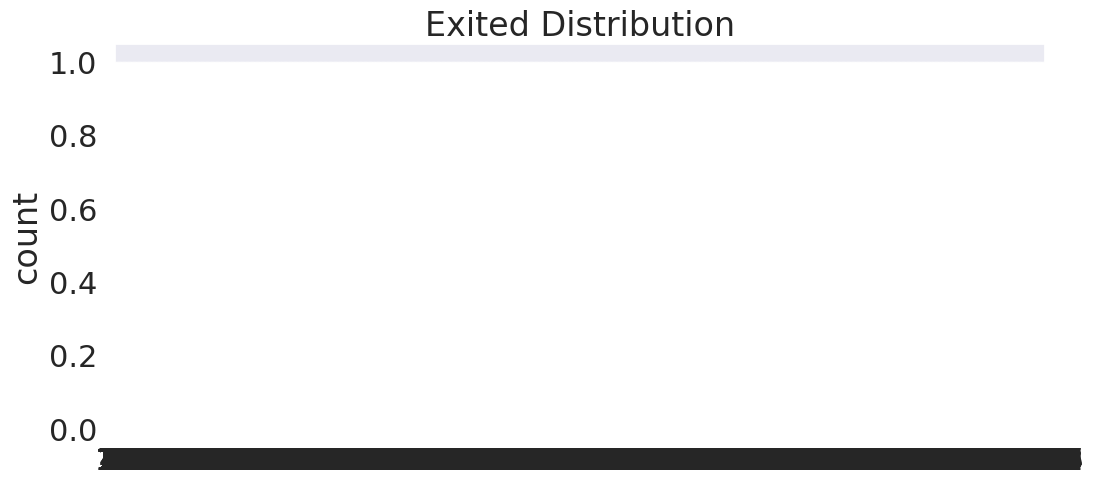

In [27]:
f = plt.figure(figsize=(12,5))

sns.countplot(y_train)
plt.title('Exited Distribution')

display(y_train.value_counts(normalize=True))

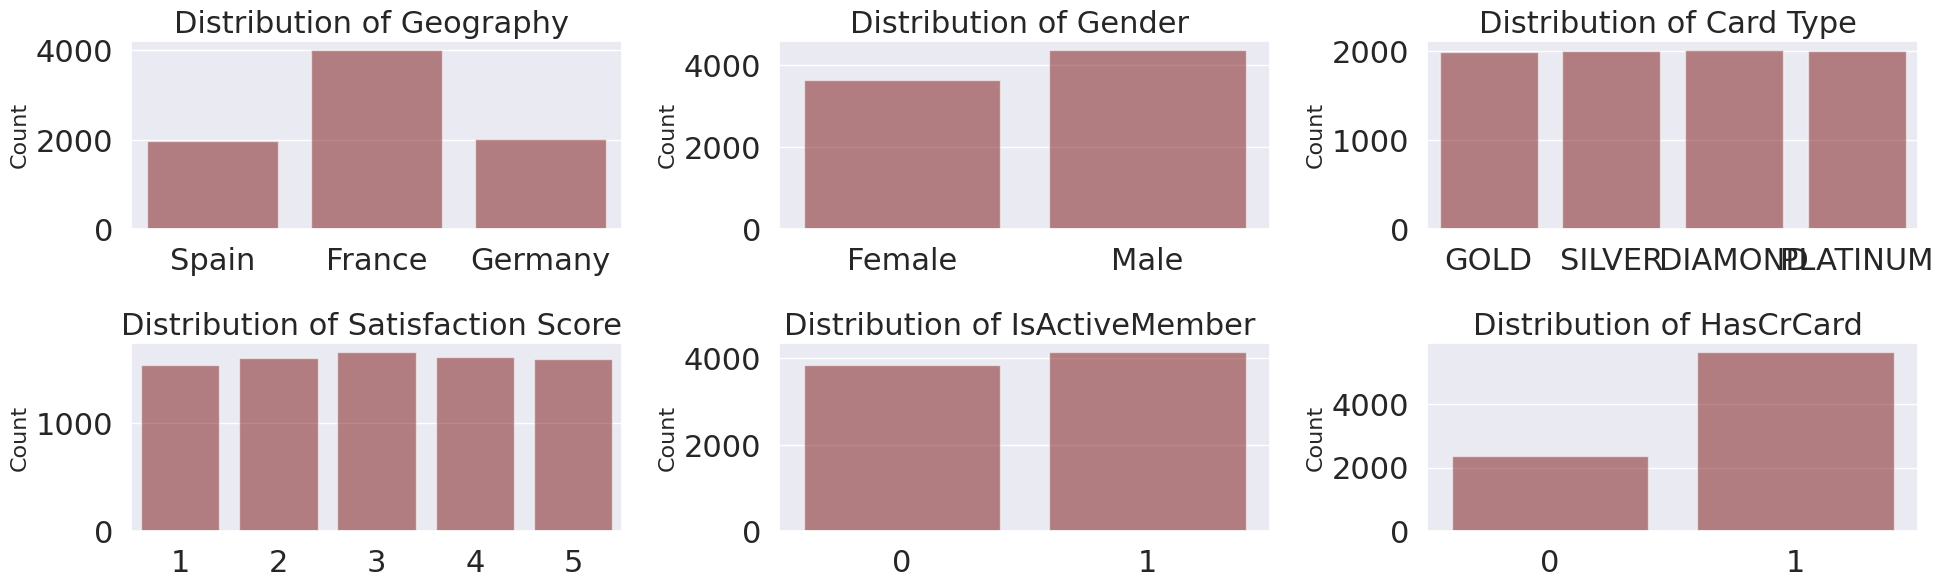

In [18]:
#plotting the distirbutions of the categorical variables
f = plt.figure(figsize=(20,15))

for i, col in enumerate(cat_feats):


    plt.subplot(5,3, i+1)
    if len(X_train[col].unique()) <= 5:
        sns.countplot(data=X_train, x=col, color='darkred', alpha=0.5)
        plt.ylabel("Count", fontdict={'fontsize':16})
    else:
        sns.countplot(data=X_train, y=col, order=X_train[col].value_counts().index,color='darkred',alpha=0.5)
    plt.title(f"""Distribution of {col} """, fontdict={'fontsize':22})
    plt.xlabel("")
    #plt.ylabel("")

plt.tight_layout()
plt.savefig("Categorical distributions")
plt.show()

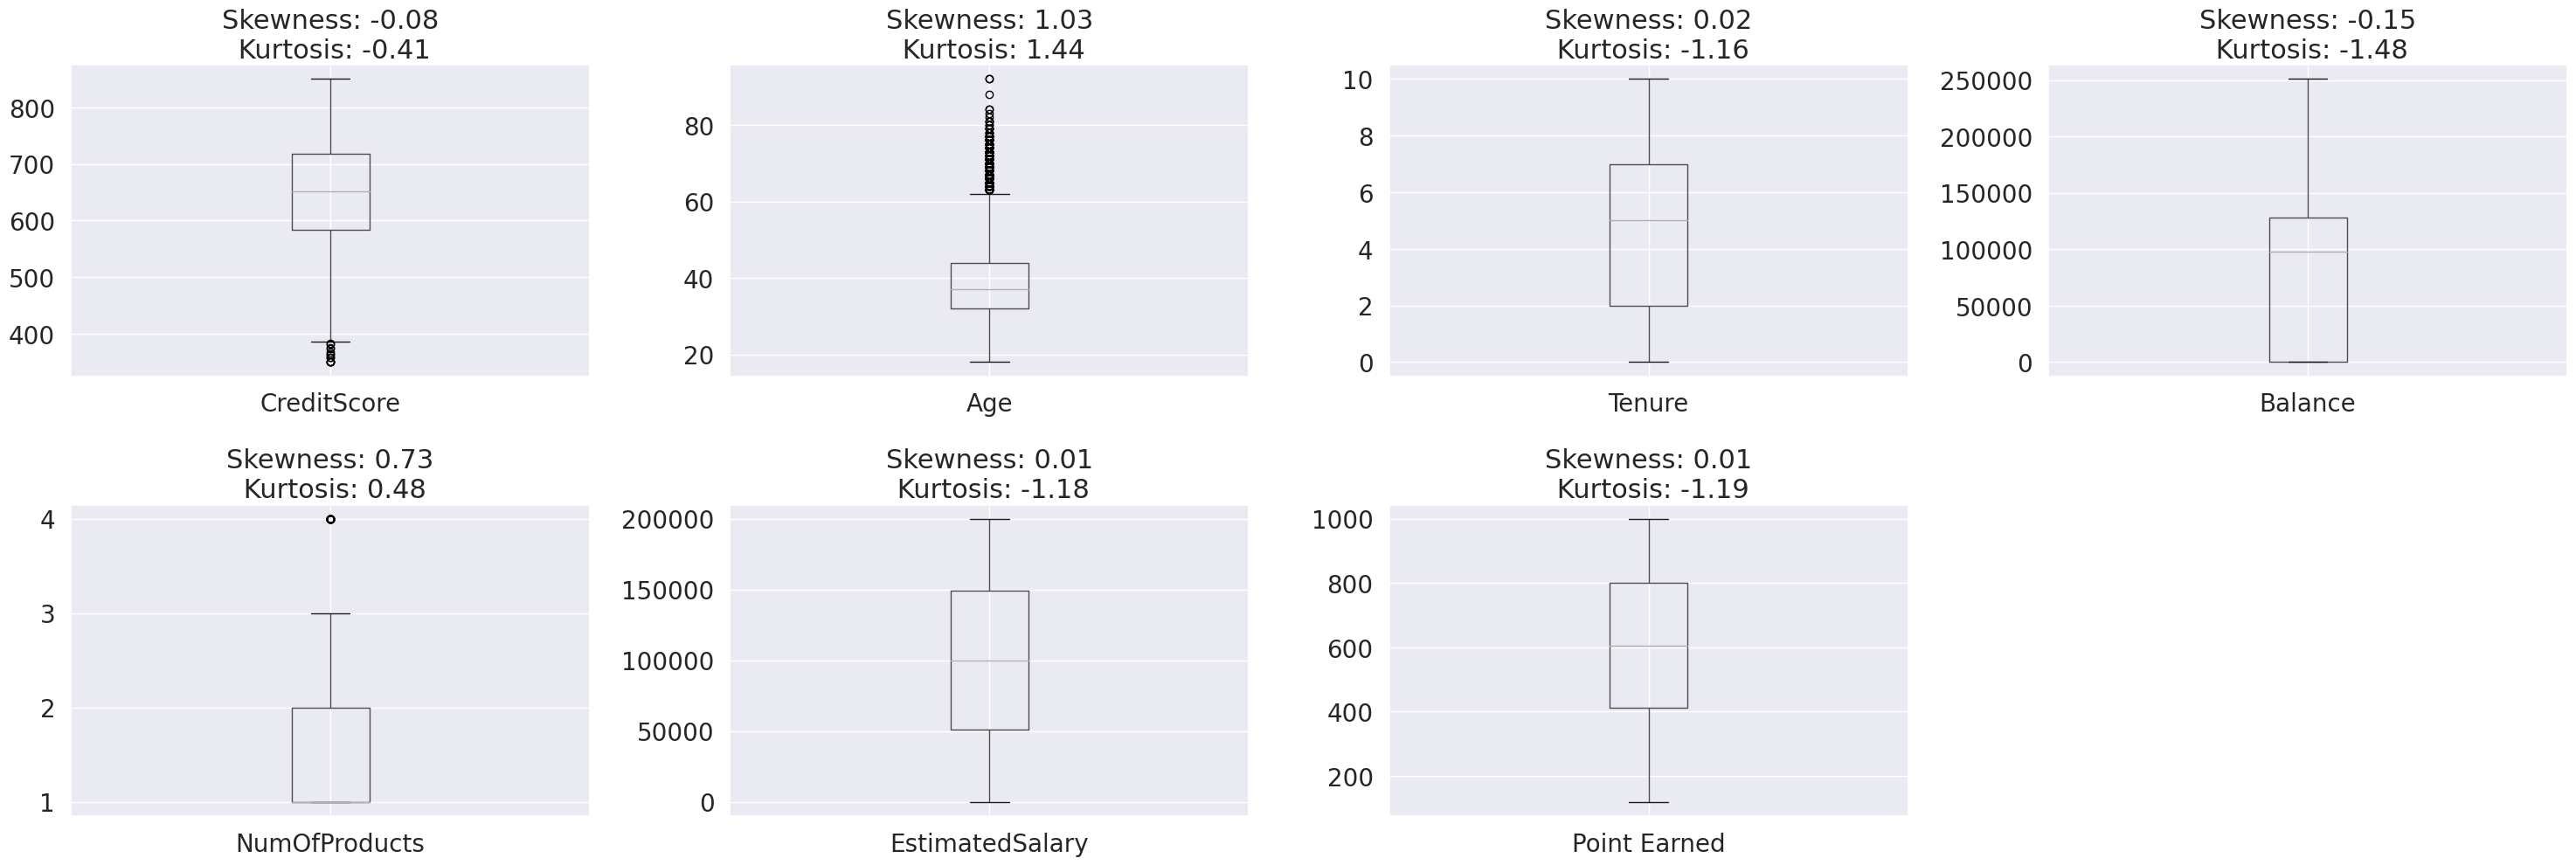

In [19]:
#plotting the distributions of the numerical variables
sns.set_style("darkgrid")
plt.figure(figsize=(30,15))
for i,col in enumerate(num_feats):
    plt.subplot(3,4,i+1)
    X_train[[col]].boxplot(fontsize=20)
    plt.title(f'Skewness: {np.round(X_train[col].skew(),2)}\n Kurtosis: {np.round(X_train[col].kurt(),2)}',
              fontdict={'fontsize':22})
    plt.savefig("cont variables")
    plt.tight_layout();

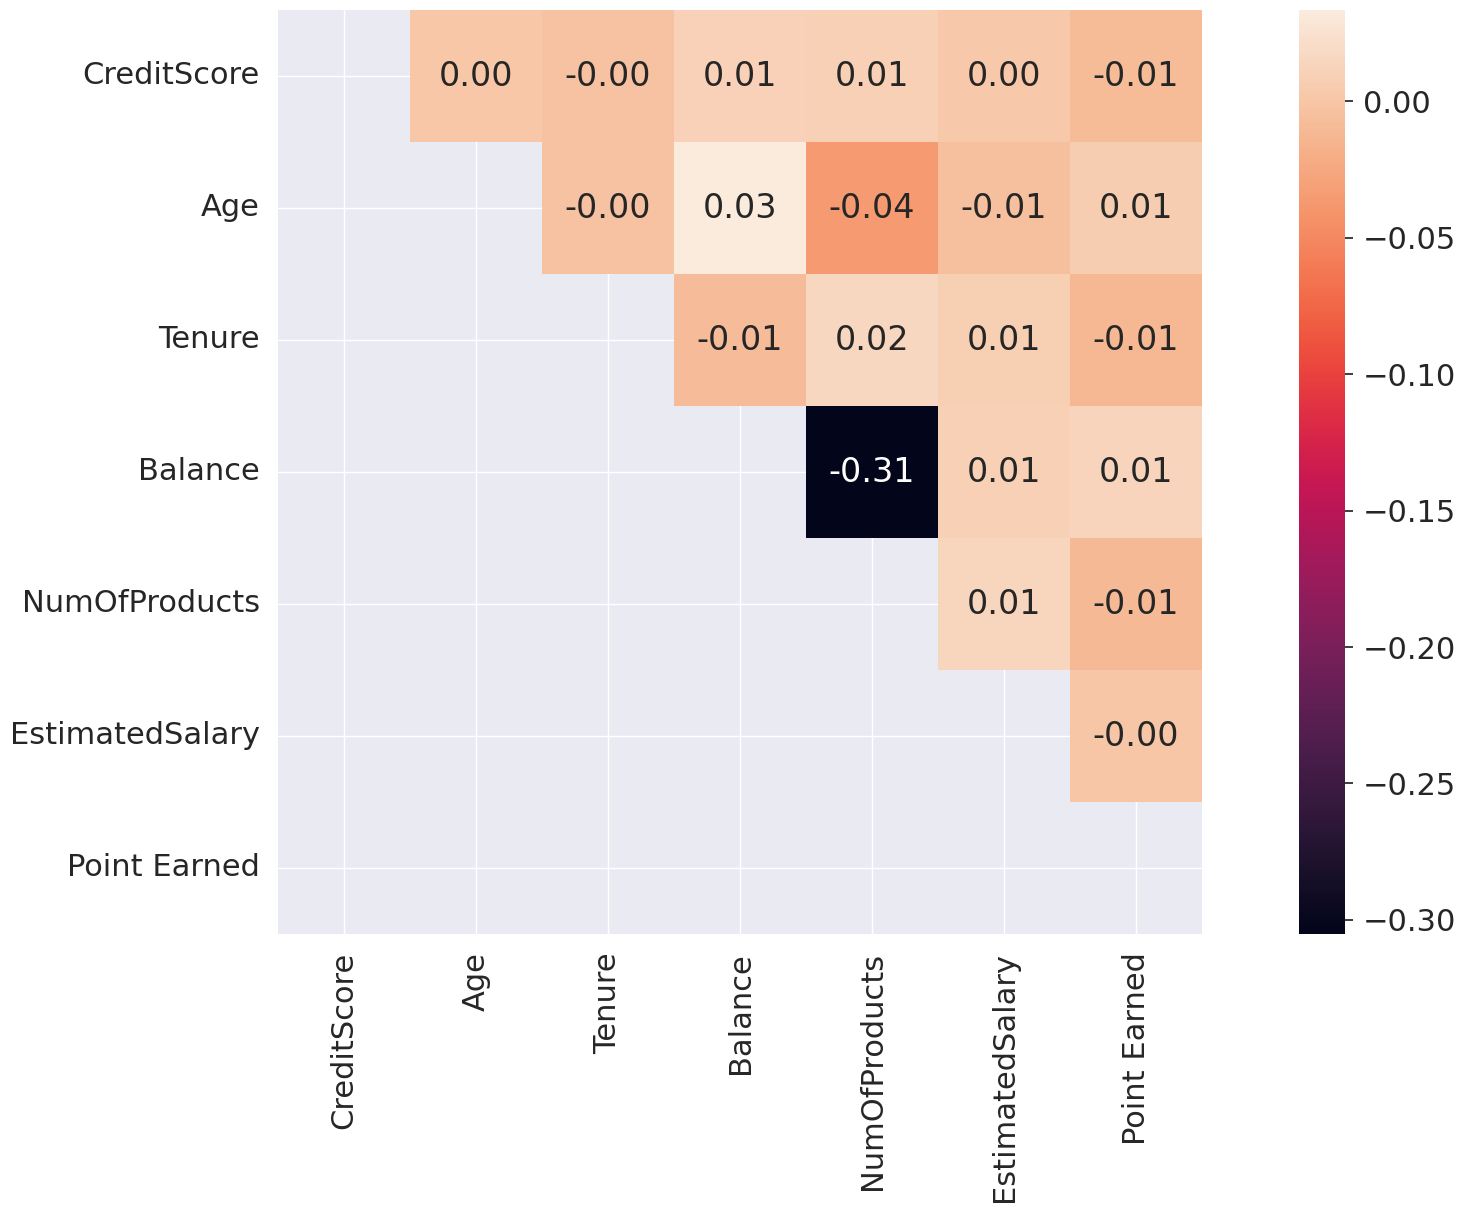

In [20]:
#correlation matrix
corr = X_train[num_feats].corr()

plt.figure(figsize=(25,12))
mask = np.tril(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".2f", mask = mask, square = True)
plt.show()

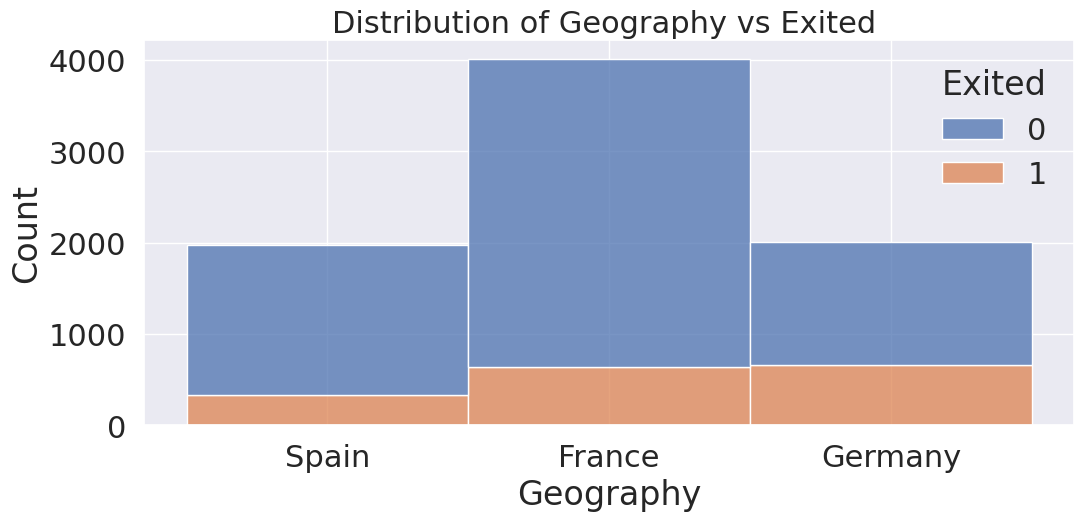

Overall frequency: 


,proportion
Geography,
France,0.501625
Germany,0.251250
Spain,0.247125


**************************************************


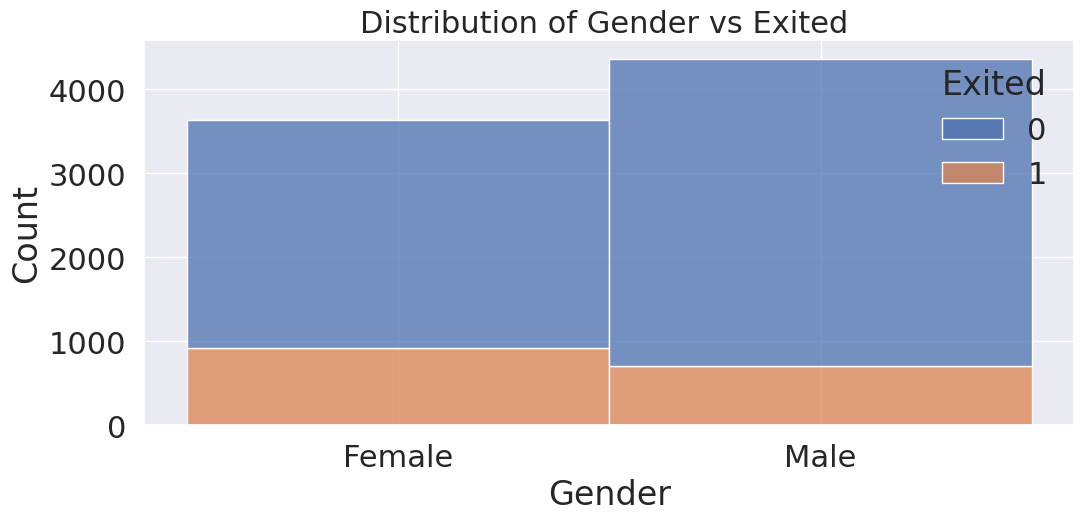

Overall frequency: 


,proportion
Gender,
Male,0.545375
Female,0.454625


**************************************************


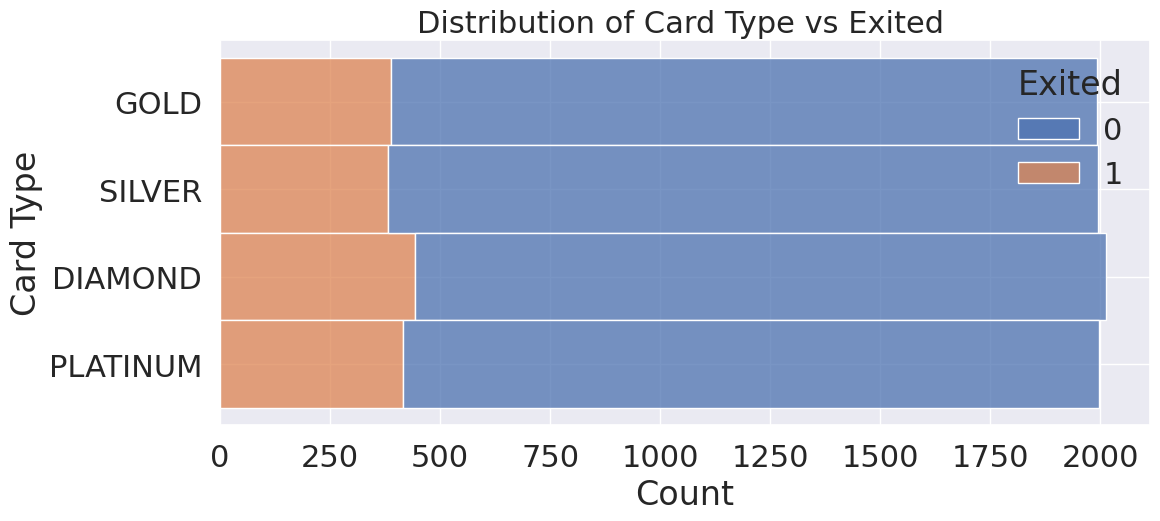

Overall frequency: 


,proportion
Card Type,
DIAMOND,0.251625
PLATINUM,0.249750
SILVER,0.249500
GOLD,0.249125


**************************************************


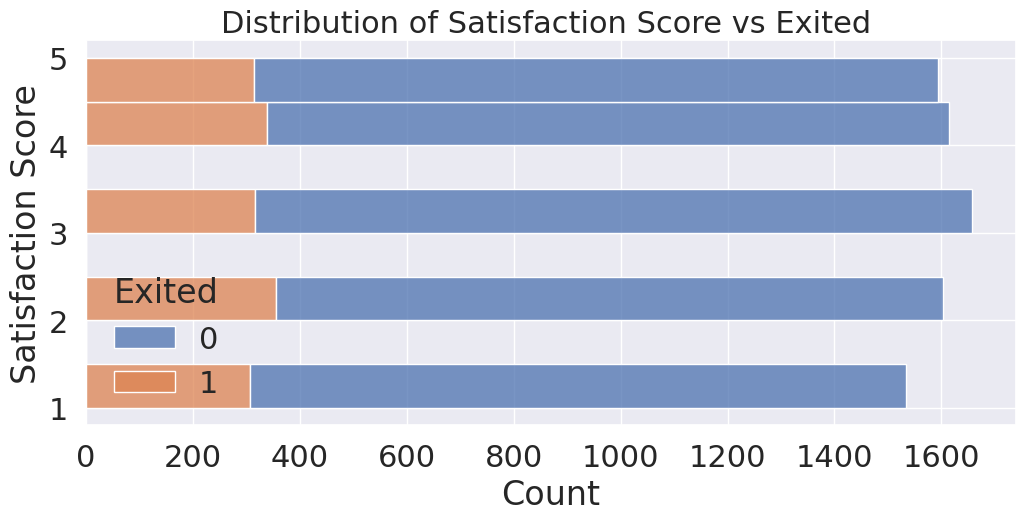

Overall frequency: 


,proportion
Satisfaction Score,
3,0.207125
4,0.201750
2,0.200375
5,0.199125
1,0.191625


**************************************************


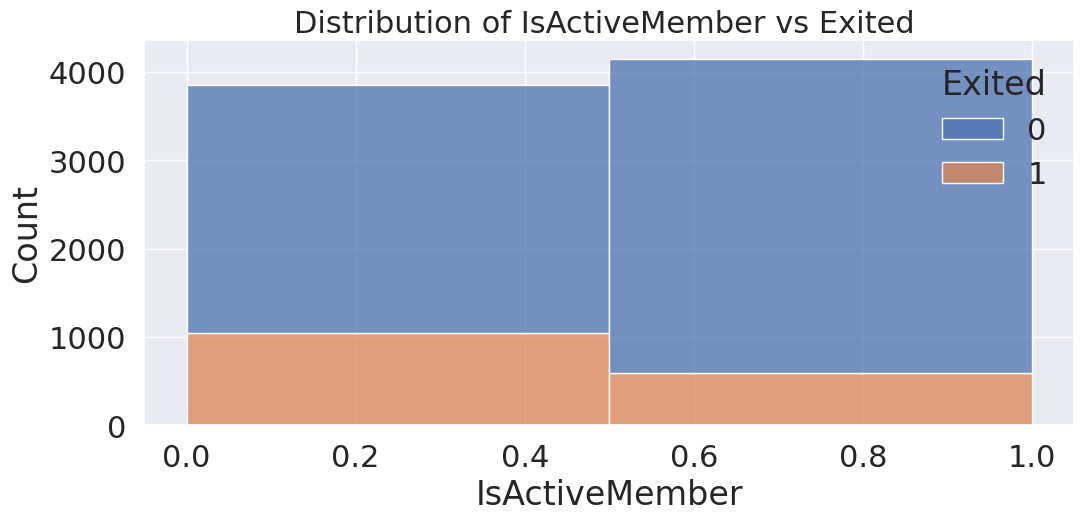

Overall frequency: 


,proportion
IsActiveMember,
1,0.518625
0,0.481375


**************************************************


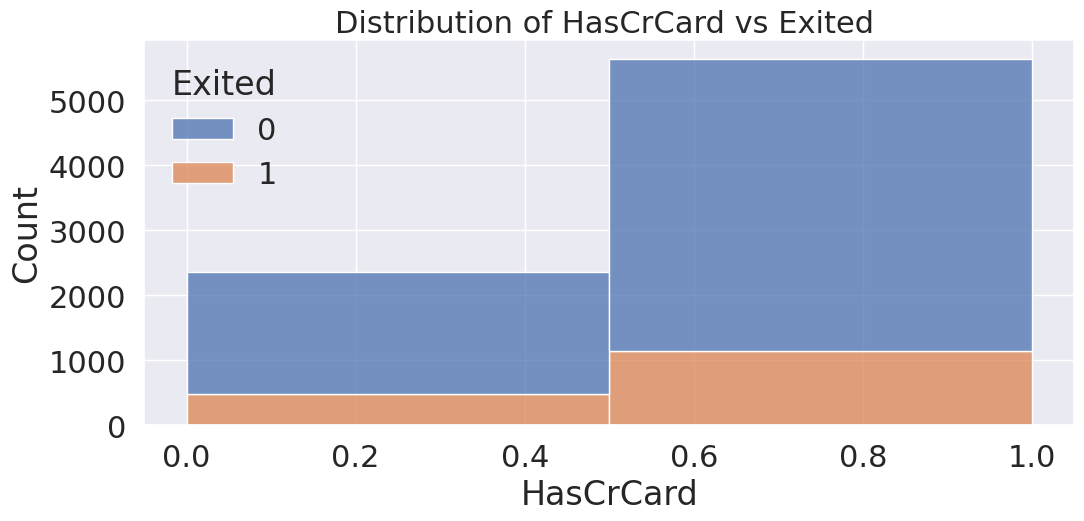

Overall frequency: 


,proportion
HasCrCard,
1,0.70525
0,0.29475


**************************************************


In [21]:
#Target variable vs categorical predictors


df_train = pd.concat([X_train, y_train],axis=1)


for col in cat_feats:
    if col in df_train.columns:
        plt.figure(figsize=(12,5))
        if len(X_train[col].unique()) < 4:
            sns.histplot(binwidth=0.5, x=col, hue=y_train, data=X_train, stat="count", multiple="stack", bins=10)
        else:
            sns.histplot(binwidth=0.5, y=col, hue=y_train, data=X_train, stat="count", multiple="stack", bins=10)
        plt.title(f"""Distribution of {col} vs Exited """, fontdict={'fontsize':22})
        plt.show()

        print('Overall frequency: ')
        display(X_train[col].value_counts(normalize=True))

        print()

        unique_values = df_train[col].unique()
        odds_dict = {}
        for unique_val in unique_values:
            is_claimed_vals = len(df_train.loc[(df_train['Exited']==1) & (df_train[col]==unique_val)])
            is_not_claimed_vals = len(df_train.loc[(df_train['Exited']==0) & (df_train[col]==unique_val)])
            odds_dict[unique_val] = round(is_claimed_vals/(is_not_claimed_vals+0.000001)*100, 2)

        odds_df = pd.Series(odds_dict, name=f'{col}_odds_ratio - Exited/Not Exited (%)').reset_index() \
            .rename(columns={'index':'Categories'})

        fig = go.Figure(data=[go.Table(
            header=dict(values=list(odds_df.columns),
                        fill_color='paleturquoise',
                        align='left'),
            cells=dict(values=[odds_df[val] for val in odds_df.columns],
                       fill_color='lavender',
                       align='left'))
        ])
        fig.update_layout(
            autosize=False)
        fig.show()

        print('*'*50)

Comment:

We can see that the odds ratio for customers that exited vs not exited is higher in Germany, meaning that Geography can help us understand some of the reason for customer churn.
We can see that the odds ratio for customers that exited vs not exited is higher in the female group (Gender), meaning that Gender can help us understand some of the reason for customer churn (More women leave the bank).

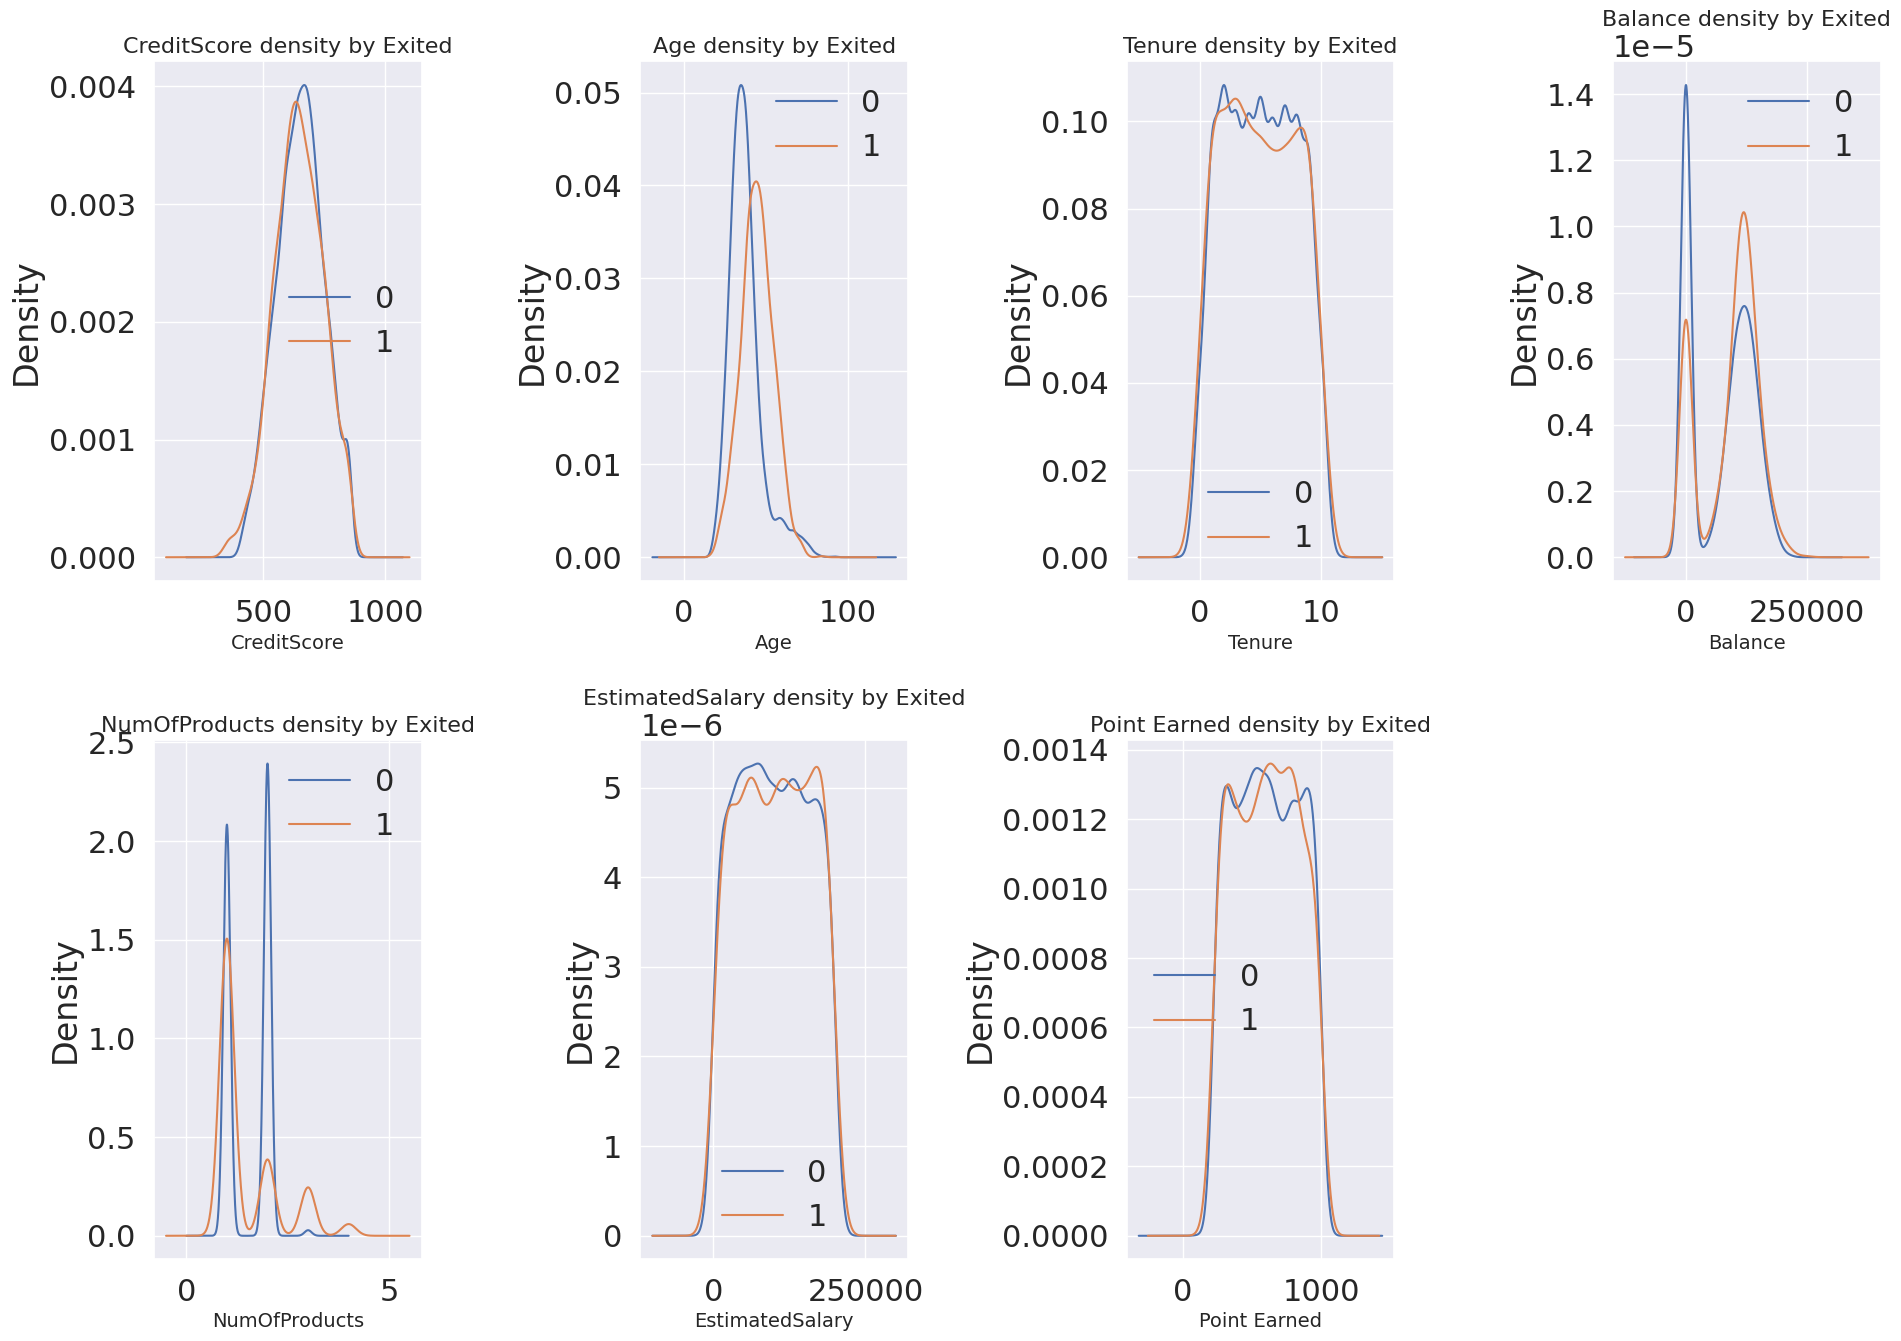

In [22]:
#Predicted feature vs numerical features

df_train = pd.concat([X_train, y_train],axis=1)
#f = plt.figure(figsize=(20,20))

for i, col in enumerate(num_feats):
    plt.subplot(3,4, i+1)

    df_train.groupby('Exited')[col].plot(kind='kde', figsize=(20, 20))
    plt.legend()
    plt.title(col + ' density by Exited',fontdict={'fontsize':16})
    plt.xlabel(col,fontdict={'fontsize':14})

plt.tight_layout()
plt.savefig("numerical vs Exited")
plt.show()

Comment:

We can see number of differences between customers that exited and customers that didn't. It seems that older customers tend to churn more.


## Preprocessing

In [23]:
#relevant categorical features
nominal_cat_feats = ['Gender', 'Geography']

## One hot encoding

In [28]:
encoder = OneHotEncoder()
nominal_mat = encoder.fit_transform(X_train[nominal_cat_feats])
nominal_df = pd.DataFrame(
                          nominal_mat.toarray(),
                          columns=encoder.get_feature_names_out(),
                          index=X_train.index
                          )

X_train = X_train.drop(columns=nominal_cat_feats)
X_train = pd.concat([X_train, nominal_df],axis=1)

In [30]:
nominal_mat_test = encoder.transform(X_test[nominal_cat_feats])
nominal_df_test = pd.DataFrame(
                               nominal_mat_test.toarray(),
                               columns=encoder.get_feature_names_out(),
                               index=X_test.index
                               )

X_test = X_test.drop(columns=nominal_cat_feats)
X_test = pd.concat([X_test, nominal_df_test],axis=1)

## Ordinal encoding mapping


In [31]:
encoder = OrdinalEncoder(categories=[np.array(['SILVER','GOLD', 'PLATINUM','DIAMOND'],dtype=object)])
X_train['Card Type'] = encoder.fit_transform(X_train[['Card Type']])
X_test['Card Type'] = encoder.transform(X_test[['Card Type']])

## Min Max scaler

In [32]:
sc = MinMaxScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

## Oversampling the data, due to imbalance, using the SMOTE method




In [33]:
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5
)

X_res, y_res = sm.fit_resample(X_train_sc, y_train)

## Modelling

In [34]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_res, y_res)

preds = rf.predict(X_test_sc)

## Model Evaluation

In [35]:
print('F-measure Random Forest test:', f1_score(y_test, preds, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, preds, pos_label=1))
print('Precision Random Forest test:', precision_score(y_test, preds))

F-measure Random Forest test: 0.6215538847117794
Recall Random Forest test: 0.6078431372549019
Precision Random Forest test: 0.6358974358974359


In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1592
           1       0.64      0.61      0.62       408

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



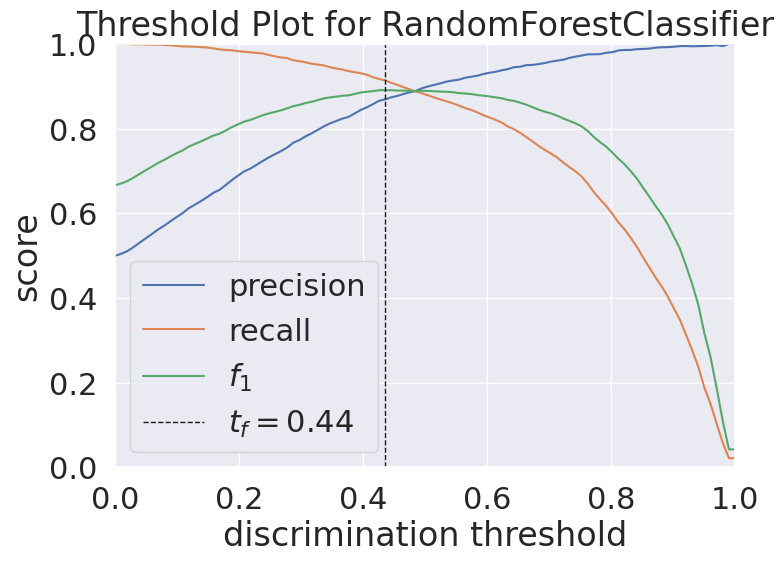

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [37]:
visualizer = DiscriminationThreshold(rf,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_res, y_res)        # Fit the visualizer and the model
visualizer.score(X_test_sc, y_test)        # Evaluate the model on the test data
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



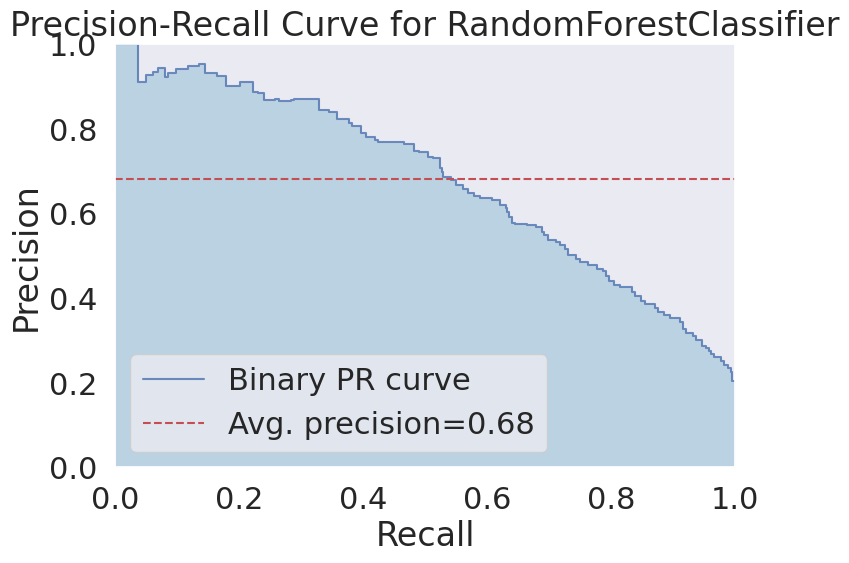

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [38]:
visualizer = PrecisionRecallCurve(rf, classes=[0, 1])

visualizer.fit(X_res, y_res)        # Fit the training data to the visualizer
visualizer.score(X_test_sc, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure